In [1]:
import numpy
from scipy import linalg, special
from scipy.integrate import solve_ivp
import matplotlib
from matplotlib import pyplot

from tqdm.notebook import tqdm

import joblib

from bmme import *

C:\Program Files\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


  0%|          | 0/501 [00:00<?, ?it/s]

C:\Users\priva\AppData\Local\Temp\ipykernel_15228\3488459367.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  currents[i] = solver.get_currents(rho_ss)


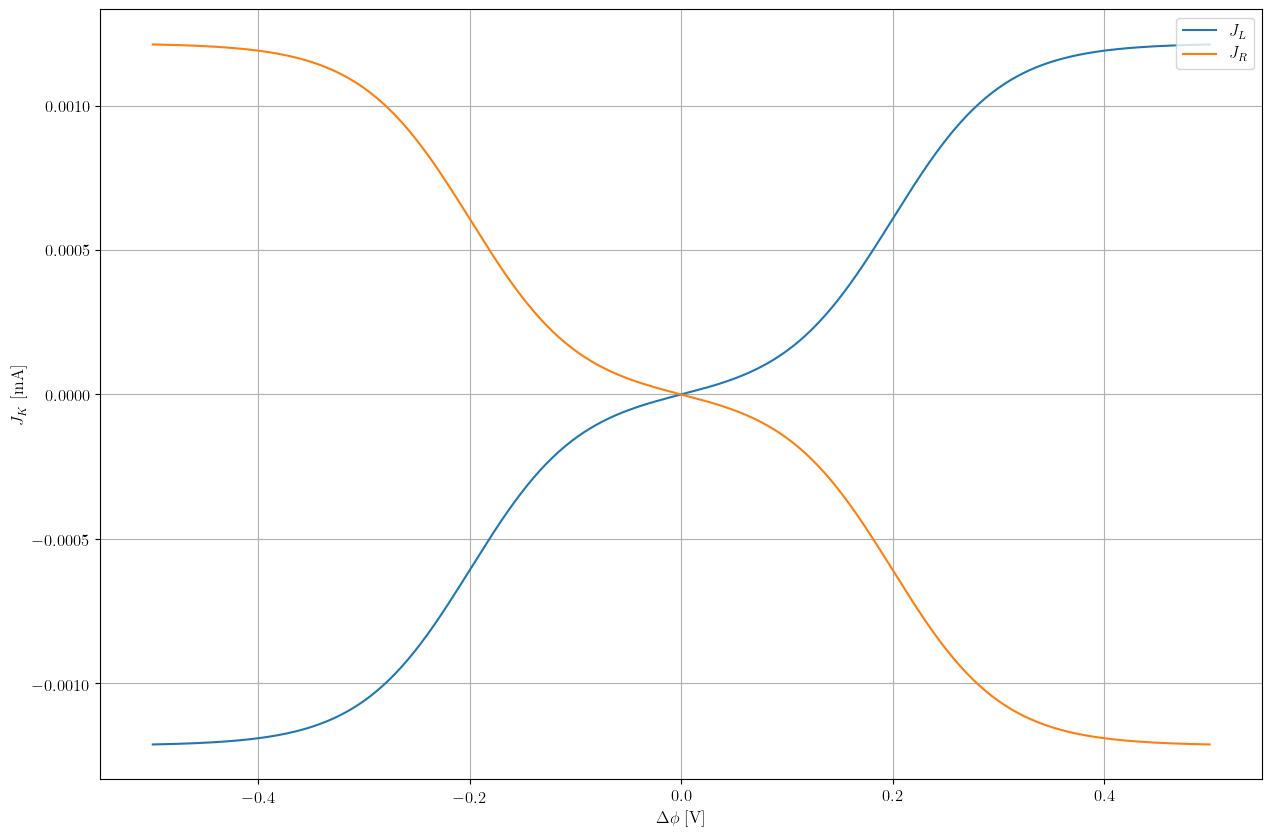

In [3]:
e_0 = 0.1 # eV
Gamma = 0.01 # eV
T = 0.026 # eV'
voltages = numpy.linspace(-.5, .5, 501)

currents = numpy.zeros((len(voltages), 2))

d_ops, d_dags = generate_fermionic_ops(1)
d_op = d_ops[0]
d_dag = d_dags[0]
H_S = e_0 * d_dag @ d_op
solver = BornMarkovSolver(H_S, [d_op], [], numpy.array([[Gamma]]), numpy.array([0, 0]), numpy.array([T, T]))

for i, voltage in enumerate(tqdm(voltages)):
    solver.chemical_potential = numpy.array([-.5*voltage, .5*voltage])
    solver.construct_liouvillian()
    rho_ss = solver.find_steady_state()
    currents[i] = solver.get_currents(rho_ss)
    
pyplot.figure(figsize=(15,10))
pyplot.plot(voltages, currents[:,0], label="$J_L$")
pyplot.plot(voltages, currents[:,1], label="$J_R$")
pyplot.grid()
pyplot.legend(loc=1)
pyplot.xlabel("$\\Delta\\phi$ [V]")
pyplot.ylabel("$J_K$ [mA]")
#pyplot.savefig("single_level_currents.pdf")
pyplot.show()

#numpy.save("data/single_level/SL_300K", currents)

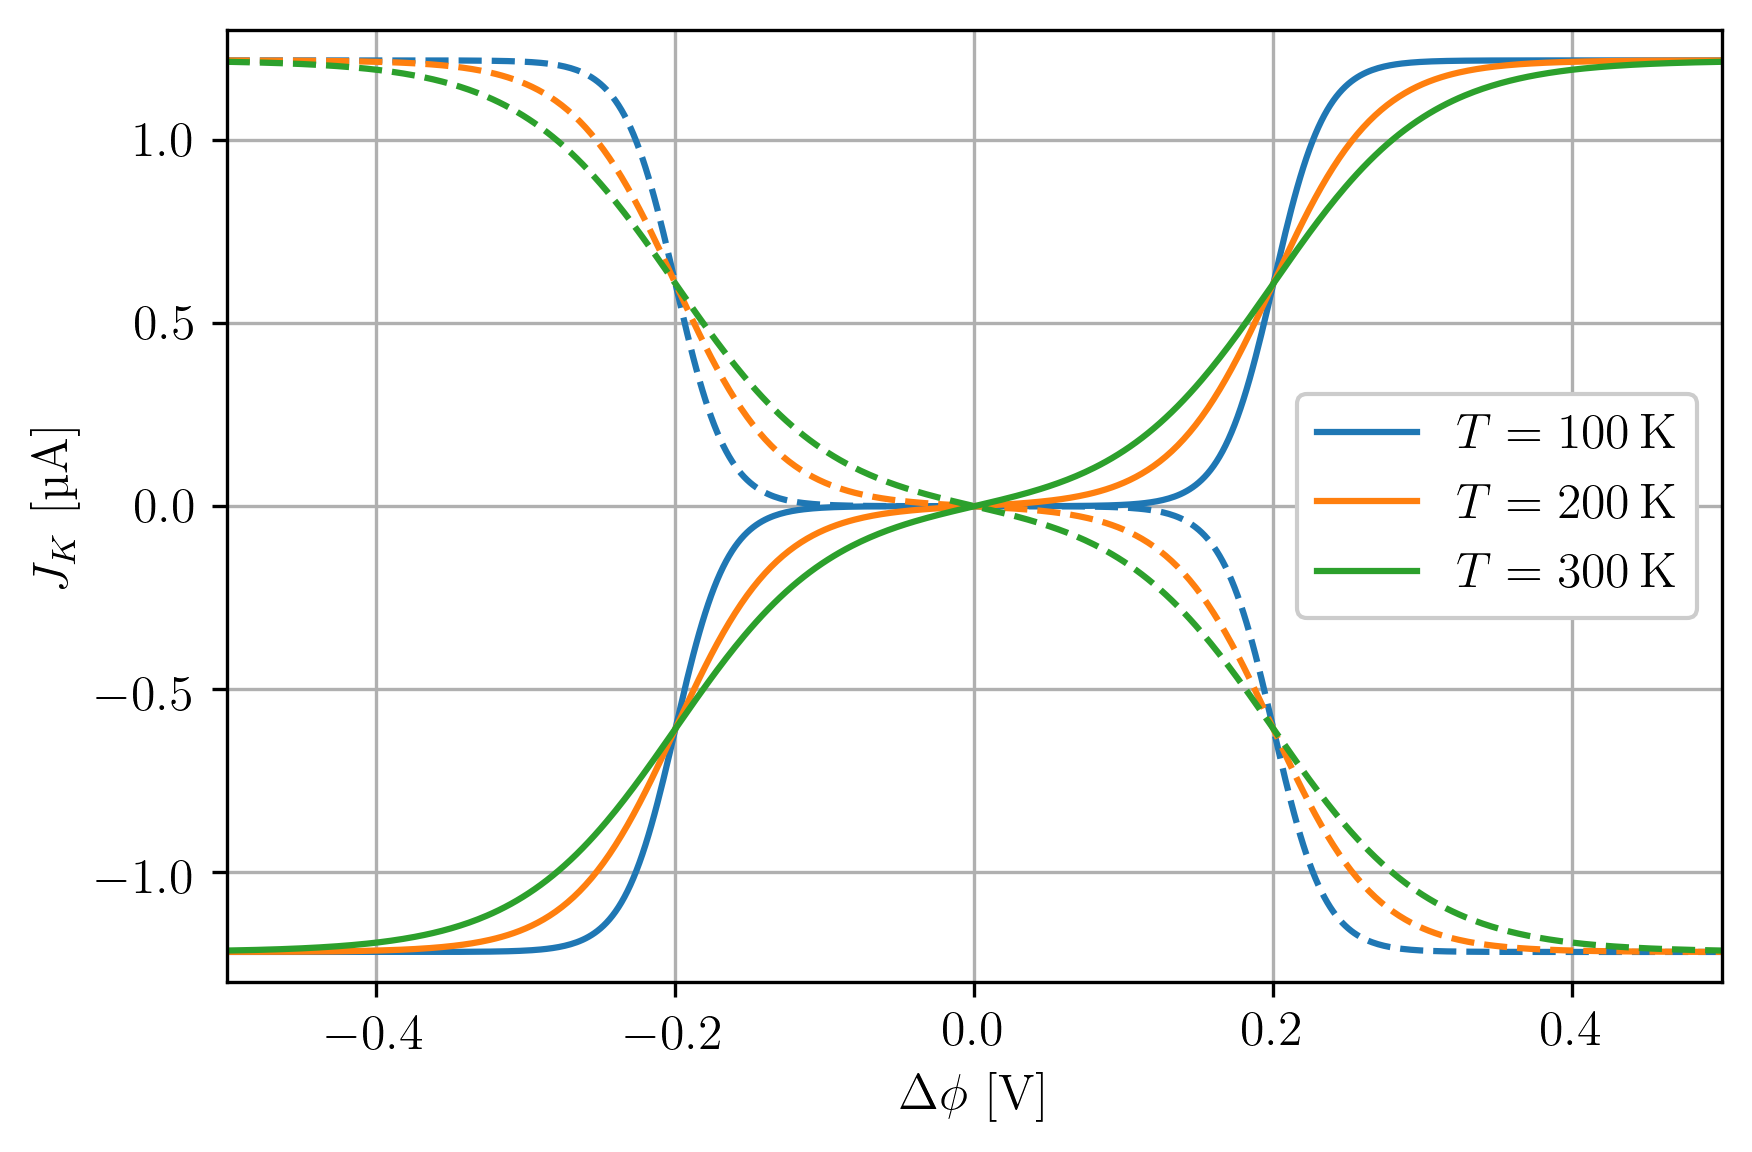

In [6]:
pyplot.figure(figsize=(6,4), tight_layout=True)
voltages = numpy.linspace(-.5, .5, 501)
pyplot.plot(voltages, 1e3*numpy.load("data/single_level/SL_100K.npy")[:,0], label="$T=100\\,\\mathrm{K}$", c="tab:blue")
pyplot.plot(voltages, 1e3*numpy.load("data/single_level/SL_100K.npy")[:,1], c="tab:blue", ls="--")
pyplot.plot(voltages, 1e3*numpy.load("data/single_level/SL_200K.npy")[:,0], label="$T=200\\,\\mathrm{K}$", c="tab:orange")
pyplot.plot(voltages, 1e3*numpy.load("data/single_level/SL_200K.npy")[:,1], c="tab:orange", ls="--")
pyplot.plot(voltages, 1e3*numpy.load("data/single_level/SL_300K.npy")[:,0], label="$T=300\\,\\mathrm{K}$", c="tab:green")
pyplot.plot(voltages, 1e3*numpy.load("data/single_level/SL_300K.npy")[:,1], c="tab:green", ls="--")
pyplot.grid()
pyplot.legend(loc=5, framealpha=1.)
pyplot.xlabel("$\\Delta\\phi$ [V]")
pyplot.ylabel("$J_K$ [µA]")
pyplot.xlim(-.5, .5)
pyplot.ylim(-1.3, 1.3)
pyplot.savefig("single_level_currents.pdf")
pyplot.gcf().set_dpi(300)
pyplot.show()